# Pyramids and Wavelets

The <a href="https://en.wikipedia.org/wiki/Pyramid_(image_processing)">Laplacian pyramid</a> and the [Discrete Wavelet Transform](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) are two closed numerical transforms that can be used to obtain a multiresolution representation of a image. http://www.uni-mannheim.de/acm97/papers/liang/acm97.html http://research.microsoft.com/en-us/um/people/jinl/paper_2002/msri_jpeg.htm

## Gaussian Scale Space (Gaussian pyramid)

The $N$-levels Gaussian pyramid $L_n;~n\in\{0,1,\cdots,N-1\}$ of a image $I$ is defined as

\begin{equation}
  \left\{\begin{array}{rcl}
    L_0 & = & I \\
    L_{n+1} & = & \text{REDUCE}(L_n);~n\in\{0,1,\cdots,N-1\}
  \end{array}\right.
\end{equation}

where the $\text{REDUCE}(s)$ operator is carried out by [convolving](http://my.ece.msstate.edu/faculty/fowler/Classes/ECE3443/Handouts/dt_convolution.pdf) $I$ with a Gaussian kernel $w$ (the unit impulse response, also known as the transfer function, of the corresponding Gaussian low-pass filter). A Gaussian kernel is the evaluation of a Gaussian function at (for example, 5, in the case 1-dimensional) values centered at zero and, the Gaussian coefficients must satisfy that

\begin{equation}
  \sum_{m=-2}^2w(m)=1
\end{equation}

(the gain of the filter is $1$)

\begin{equation}
  w(i)=w(-i); i=0,1,2
\end{equation}

(the kernel is symmetric), and being $w[0]=a$, $w[-1]=w[1]=b$ and $w[-2]=w[2]=c$, it holds that

\begin{equation}
  a=2b-2c.
\end{equation}

Notice that in this case, $w=\{\frac{1}{16}, \frac{4}{16}, \frac{6}{16}, \frac{4}{16}, \frac{1}{16}\}$. This is the 1D kernel. The 2D version can be extended or the 1D can be applied by rows and then by columns, or viceversa.

As it will be seen in the demo (see below), the Gaussian scale space exhibits several interesting properties:

1. *Spatial homogeneity*: all locations in the image are filtered with the same gain.
2. *Spatial isotropy*: all the structures are treated with homogeneity independently of their orientation.
3. *Spatial scale invariace*: the gain of the filtering is independent of the size of the objects of the image.
4. *Linearity*: the filtering is carried out with a convolution, which is a linear operator.

The last stage of the $\text{REDUCE}(\cdot)$ operator is the decimation (the even or the odd samples are removed) of the filtered image. This is a lossless stage (without aliasing) only in the case the half of the high-frequency components of $L_n$ are not available in $L_{n+1}$. Notice that, as a consequence of the decimation, the overall energy of $L_{n+1}$ will be, on average, 1/4 of $G_n$.

### Gaussian pyramid of *lena*

\# Import the [urllib.request — extensible library for opening URLs](https://docs.python.org/3.0/library/urllib.request.html) module, the [urllib](https://docs.python.org/3/library/urllib.html) package is included in the standard library.

In [1]:
import urllib.request

\# Import [Python bindings](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_setup/py_intro/py_intro.html) for [OpenCV](http://docs.opencv.org/3.0-beta/index.html), a computer vision library. Install the package with "`pip3 install opencv-python`". Recomended reading [OpenCV-Python Tutorials](http://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html).

In [2]:
import cv2

\# Import [NumPy](http://www.numpy.org), an efficient array manipulation library. Install with "`pip3 install pip3 install numpy`".

In [3]:
import numpy as np

\# Import the [pyplot API](http://matplotlib.org/api/pyplot_api.html) module from [matplotlib](http://matplotlib.org/index.html) package, a library for 2D plotting. This will allow us to plot data, interactively. Install with "`pip3 install matplotlib`".

In [4]:
from matplotlib import pyplot as plt

\# [Configure matplotlib](http://ipython.readthedocs.io/en/stable/interactive/plotting.html) for plotting inside Jupyter Notebook (not in external windows).

In [5]:
%matplotlib inline

\# Request the [lena image](https://en.wikipedia.org/wiki/Lenna). This function returns a file-like object.

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')

\# [Read](https://docs.python.org/3/tutorial/inputoutput.html) the complete "file" `HTTP_response` as a <a href="https://docs.python.org/3/library/functions.html#bytes">bytes object</a>. This (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">inmutable</a>) object  is transformed in a (<a href="https://en.wikibooks.org/wiki/Python_Programming/Data_Types#Mutable_vs_Immutable_Objects">mutable</a>) <a href="https://docs.python.org/3/library/functions.html#bytearray">bytearray object</a>, as the NumPy's [asarray](https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html) (function) converter, requires. The final result is [array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) object containing unsigned integers of 8 bits.

In [7]:
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)

\# [Decompress](http://docs.opencv.org/3.0-beta/modules/imgcodecs/doc/reading_and_writing_images.html) the content of the input array. Returns an [image object](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html).

In [8]:
I = cv2.imdecode(arr,-1)

In [9]:
print(I)

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ..., 
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ..., 
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ..., 
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ..., 
 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ..., 
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ..., 
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  83]
  [ 57  22  82]
  [ 62  32  96]
  ..., 
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


\# Convert the image to the RGB [color space](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor).

In [10]:
tmp = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I = tmp

In [11]:
print (I)

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ..., 
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ..., 
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ..., 
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ..., 
 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ..., 
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ..., 
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 83  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ..., 
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


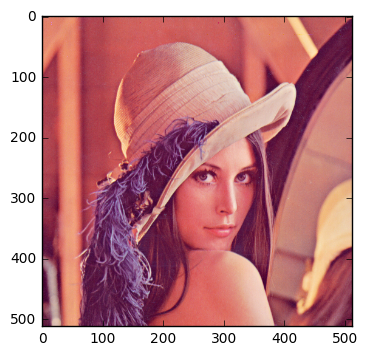

In [12]:
plt.imshow(I)

\# Compute the pyramid. We use a <a href="https://docs.python.org/3/library/stdtypes.html#sequence-types-list-tuple-range">list</a> for storing the floors of it.

In [13]:
N = 6 # Number of levels of the pyhramid
L = [I] # G_0 (the base of the pyramid)

\# OpenCV's <a href="http://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gaf9bba239dfca11654cb7f50f889fc2ff">pyrDown</a> low-pass filter and decimate an image. Extra info [here](http://docs.opencv.org/master/dc/dff/tutorial_py_pyramids.html).

In [14]:
for n in range(N-1):
    print(n, len(L), len(L[n]))
    L.append(cv2.pyrDown(L[n]))

0 1 512
1 2 256
2 3 128
3 4 64
4 5 32


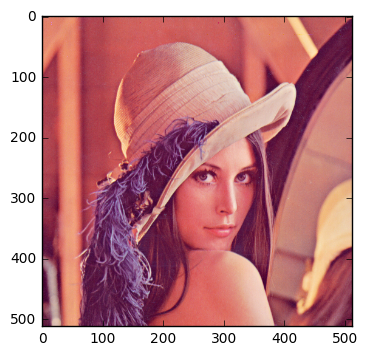

In [15]:
plt.imshow(L[0])

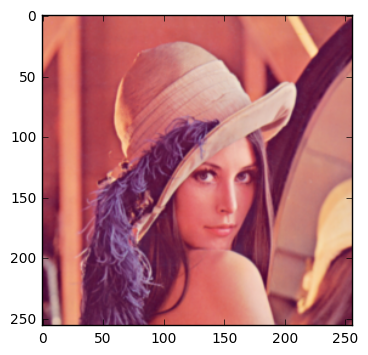

In [16]:
plt.imshow(L[1])

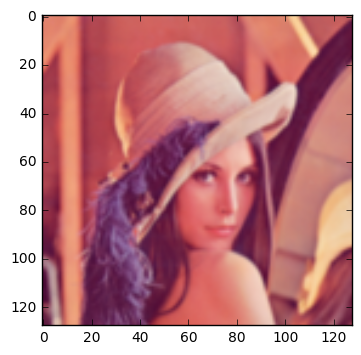

In [17]:
plt.imshow(L[2])

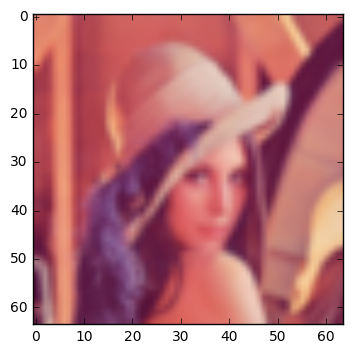

In [18]:
plt.imshow(L[3])

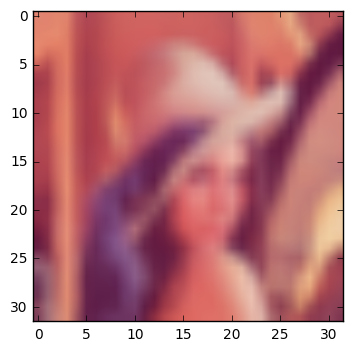

In [19]:
plt.imshow(L[4])

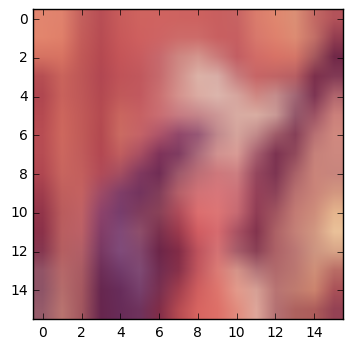

In [20]:
plt.imshow(L[5])

## Laplacian pyramid (Laplacian Pyramid Transform) (LPT)

### Forward transform

In the Gaussian pyramid, the image $L_{N-1}$ (the "roof") may serve as a prediction for the image (next floor) $L_{N−2}$, and if this prediction is substracted to $L_{N-2}$, the resulting error signal $H_{N-2}$ can have a lower entropy than $L_{N-2}$. This process can be applied to the complete Gaussian pyramid, level by level, obtaining a Laplacian pyramid by means of:

\begin{equation}
  \left\{\begin{array}{rcl}
    H_{N-1} & = & L_{N-1} \\
    H_n     & = & L_n - \text{EXPAND}(L_{n+1});~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}


### LPT of Lena

In [21]:
H = [L[N-1]]
for n in range(N-1):
    interpolation = cv2.pyrUp(L[N-n-1])
    difference = L[N-n-2] - interpolation + 128
    H.append(difference)
H.reverse()

[[[128 128 126]
  [129 128 126]
  [127 128 134]
  ..., 
  [133 139 134]
  [128 128 127]
  [109  99 109]]

 [[128 128 126]
  [129 128 126]
  [127 128 134]
  ..., 
  [133 139 134]
  [128 128 127]
  [109  99 109]]

 [[128 128 127]
  [129 128 126]
  [127 128 134]
  ..., 
  [135 141 135]
  [131 130 128]
  [111 101 110]]

 ..., 
 [[125 122 127]
  [124 121 126]
  [130 129 122]
  ..., 
  [130 134 132]
  [127 129 125]
  [131 122 128]]

 [[124 127 124]
  [122 126 122]
  [133 134 124]
  ..., 
  [132 129 127]
  [132 130 129]
  [135 133 129]]

 [[125 127 124]
  [122 126 122]
  [133 134 123]
  ..., 
  [131 129 126]
  [131 129 129]
  [134 132 129]]]


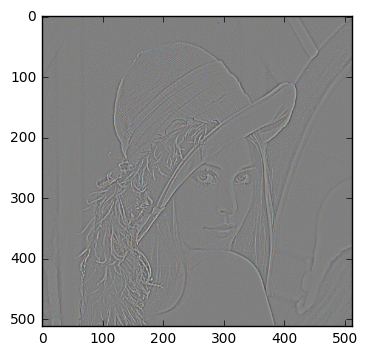

In [22]:
print(H[0])
plt.imshow(H[0])                            

[[[129 128 129]
  [127 129 132]
  [128 127 127]
  ..., 
  [143 148 143]
  [143 147 136]
  [129 127 121]]

 [[129 129 130]
  [127 129 133]
  [127 127 128]
  ..., 
  [147 152 146]
  [149 153 140]
  [136 133 125]]

 [[129 129 131]
  [128 129 132]
  [127 128 128]
  ..., 
  [156 157 146]
  [156 155 139]
  [137 133 125]]

 ..., 
 [[126 128 126]
  [127 129 126]
  [129 129 127]
  ..., 
  [129 128 128]
  [138 135 129]
  [144 135 129]]

 [[125 125 127]
  [126 127 126]
  [128 127 127]
  ..., 
  [135 134 133]
  [143 137 132]
  [143 135 130]]

 [[121 124 124]
  [127 127 133]
  [129 128 134]
  ..., 
  [145 139 135]
  [148 138 133]
  [151 138 131]]]


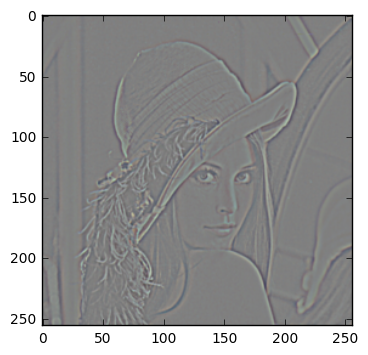

In [23]:
print(H[1])
plt.imshow(H[1])

[[[128 131 135]
  [127 130 134]
  [129 131 134]
  ..., 
  [129 126 127]
  [150 149 141]
  [165 171 150]]

 [[127 130 133]
  [128 129 131]
  [129 130 132]
  ..., 
  [137 131 129]
  [149 146 138]
  [149 152 140]]

 [[127 128 127]
  [127 127 127]
  [128 128 128]
  ..., 
  [145 139 132]
  [125 123 124]
  [ 96 105 118]]

 ..., 
 [[120 120 123]
  [120 118 121]
  [114 109 115]
  ..., 
  [120 120 122]
  [120 120 123]
  [122 121 123]]

 [[120 121 122]
  [120 118 120]
  [112 108 114]
  ..., 
  [120 121 123]
  [126 126 127]
  [143 134 130]]

 [[119 120 123]
  [119 117 120]
  [110 105 112]
  ..., 
  [123 124 126]
  [143 138 135]
  [170 151 140]]]


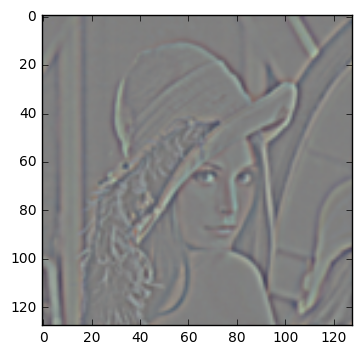

In [24]:
print(H[2])
plt.imshow(H[2])

[[[127 131 137]
  [128 130 134]
  [126 128 129]
  ..., 
  [140 137 132]
  [144 140 133]
  [149 149 140]]

 [[128 129 130]
  [128 128 130]
  [127 127 127]
  ..., 
  [147 141 133]
  [145 139 132]
  [119 123 127]]

 [[128 127 127]
  [128 127 126]
  [128 126 127]
  ..., 
  [152 143 133]
  [121 123 125]
  [ 85  99 115]]

 ..., 
 [[116 106 110]
  [125 120 123]
  [140 155 152]
  ..., 
  [141 144 142]
  [128 130 130]
  [112 111 115]]

 [[ 98  91 101]
  [106 101 110]
  [133 145 145]
  ..., 
  [139 144 141]
  [120 120 122]
  [108 106 111]]

 [[ 90  84  96]
  [ 94  87 101]
  [136 143 144]
  ..., 
  [124 128 127]
  [107 108 113]
  [114 110 112]]]


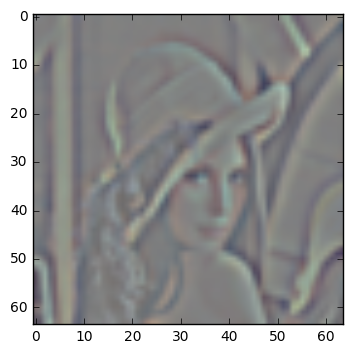

In [25]:
print(H[3])
plt.imshow(H[3])

\# Compute (and plot) the histograms of the pyramid using [`cv2.calcHist()`](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html).

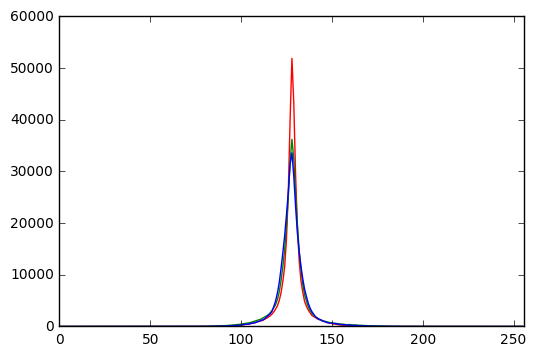

In [26]:
colors = ('r','g','b')
sum_histr = [0 for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    sum_histr[i] = np.zeros([256,1], np.float64)
for i,col in enumerate(colors):
    for n in range(N):
        histr = cv2.calcHist([H[n]],[i],None,[256],[0,256]) # cv2.calcHist returns a float64 array
        sum_histr[i] += histr
    plt.plot(sum_histr[i], color = col)
plt.xlim([0,256])
plt.show()

\# Count the number of elements in each component of the pyramid.

In [27]:
n_pels = 0
for n in range(N):
    n_pels += ((I.shape[0]+1) >> n) * ((I.shape[1]+1) >> n)

In [28]:
print("Number of elements in the original image =", I.shape[0]*I.shape[1])

Number of elements in the original image = 262144


In [29]:
print("Number or elements in (a component of) the pyramid =", n_pels, "(",100.*(n_pels/(1.*I.shape[0]*I.shape[1])-1),"% of increment)")

Number or elements in (a component of) the pyramid = 350465 ( 33.69178771972656 % of increment)


\# Install [`scipy`](https://www.scipy.org) with `pip3 install scipy` to use "[`scipy.stats.entropy`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.entropy.html)".

In [30]:
import scipy.stats as st

In [31]:
entropy = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy[i] = st.entropy(sum_histr[i])
    print(col, entropy[i])

r [ 3.09347403]
g [ 3.38051946]
b [ 3.3308082]


In [32]:
import math
codestream_size = 0.
for i,col in enumerate(colors):
    codestream_size += float(n_pels*entropy[i])
print("Expected length of the compressed image (all components) =", math.ceil(codestream_size/8.), "bytes")

Expected length of the compressed image (all components) = 429530 bytes


### Inverse transform

The original image $I$ can be recovered from $\{H_n; n=N-1,\cdots,0\}$, the Laplacian pyramid, using the procedure:

\begin{equation}
  \left\{\begin{array}{rcl}
    I & = & H_{N-1} \\
    I & = & \text{EXPAND}(I) + H_n;~n\in\{N-2,N-3,\cdots,0\}
\end{array}\right.
\end{equation}

Notice that, basically, we have reconstructed (in-place) the whole Gaussian Pyramid.

### Inverse LPT of Lena

In [33]:
R = H[N-1]
for n in range(N-1):
    R = cv2.pyrUp(R)
    R = R + H[N-n-2] - 128

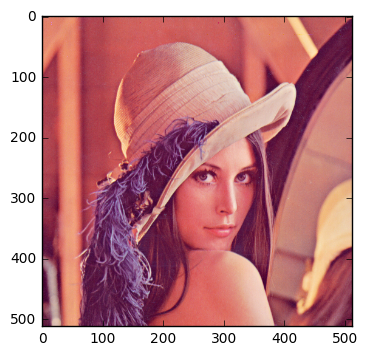

In [34]:
plt.imshow(R)

In [35]:
# Check if the reconstruction is lossless
print((R == I).all())

True


## Discrete Wavelet Transform (DWT)

### Forward transform

The [DWT](https://en.wikipedia.org/wiki/Discrete_wavelet_transform) can be computed using two different techniques. The first one is through a cascade of quadrature mirror filters banks, also known as PRFBs (Perfect Reconstruction Filter Banks). The second one, using Lifting. The main differences between both alternatives are: 

1. Filter banks use decimation and therefore, half of output coefficients are discarded after their computation. This is rather inefficient.
2. Lifting provides a more general framework in which non-lineal transforms, for example, can de defined. This can be useful to create transforms suitable for representing non-linear systems such as motion compensation in video compression.

However, in order to create a comparison between pyramids and wavelets, we will work, first, with the PRFB option.

The one-step inverse DWT of a signal $S$ can be defined by:

\begin{equation}
  S = \uparrow^2(L)*{\cal L}^{-1} + \uparrow^2(H)*{\cal H}^{-1}
\end{equation}

where $L$ and $H$ are the low-pass subband and the high-pass subband, respectively, generated by the forward DWT, and ${\cal L}^{-1}$ and ${\cal H}^{-1}$ are the synthesis filters of the "inverse transform". The subbands are computed by convolving the signal $S$ as

\begin{equation}
  \begin{array}{rcl}
      L & = & \downarrow^2(S*{\cal L})\\
      H & = & \downarrow^2(S*{\cal H}),
  \end{array}
\end{equation}

where ${\cal L}$ and ${\cal H}$ are (the response to the unit impulse signal of) the analysis filters of the "forward transform". If we express these filters in the $Z$-domain, in the case of a PRFB [it holds that](https://www.google.es/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwjTveDwhpfQAhUB1RoKHTSLAd8QFgglMAA&url=http%3A%2F%2Fwww.springer.com%2Fcda%2Fcontent%2Fdocument%2Fcda_downloaddocument%2F9781447149408-c2.pdf%3FSGWID%3D0-0-45-1376222-p174792774&usg=AFQjCNG-ItYeO23545Xq4BkLVkiF_rv79w&sig2=T3P171UkA28M-arguJGgdw)

\begin{equation}
  \begin{array}{rcl}
      {\cal L}^{-1}(z) & = & {\cal L}(-z)\\
      {\cal H}^{-1}(z) & = & -{\cal H}(-z).
  \end{array}
\end{equation}

In other words, in the case of the low-pass synthesis filter ${\cal L}^{-1}$, it is the same than ${\cal L}$, but the filter has been [modulated by the signal $(-1)^n; n\in\mathbb{N}$](http://fourier.eng.hmc.edu/e161/lectures/filterbank/node1.html), and in the case of the high-pass synthesis filter ${\cal H}^{-1}$, the coeffients of the filter also has the oposite sign. Because the frequency response of real-domain signals (and also the transfer function of the filters) are periodic in the Fourier domain, with period $\pi$ (the frequency of the signal $(-1)^n; n\in\mathbb{N}$), in the practice we can implement the PRFB considering that

\begin{equation}
  \begin{array}{rcl}
      {\cal L}^{-1}(z) & = & {\cal L}(z)\\
      {\cal H}^{-1}(z) & = & -{\cal H}(z).
  \end{array}
\end{equation}

This the definition of the 1-level DWT. The $N$-levels DWT is computed by applying the 1-level DWT to the $L$ subband, recursively:

\begin{equation}
  \left\{\begin{array}{rcl}
    L^N & = & \downarrow^2(L^{N-1}*{\cal L}) \\
    H^N & = & \downarrow^2(L^{N-1}*{\cal H})
  \end{array}\right.
\end{equation}

By definition, $L^0=S$.



# (LPT - DWT) relationship

## DWT $\rightarrow$ LPT

Considering the previous equation, it can be easely deduced that the LPT is described by 

\begin{equation}
  \left\{\begin{array}{rcl}
    L^N & = & \downarrow^2(L^{N-1}*{\cal L}) \\
    H^N & = & L^{N-1}*{\cal H}.
  \end{array}\right.
\end{equation}

Therefore, it is possible to compute the LPT by means of the DWT if the interpolate the coefficients its coefficients. In the case of a image, we have for the 1-level DWT the subbands:

```
+------+------+
|   L  |  LH  |
+------+------+
|  HL  |  HH  |
+------+------+
```

\# Install [PyWavelets](https://pywavelets.readthedocs.io/en/latest/) with "`pip3 install pywavelets`".

In [36]:
import pywt

In [38]:
# Compute the DWT of each component
#print (pywt.wavelist(short=False))
print (pywt.wavelist())

coeffs = [None]*3
for i,col in enumerate(colors):
    print(i)
    coeffs[i] = pywt.dwt2(I[:,:,i], 'bior3.5')

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [42]:
# N-levels 2D DWT
for i,col in enumerate(colors):
    full_coeffs = pywt.wavedec2(I[:,:,i], 'bior3.5', level=N)

In [52]:
print(full_coeffs[0].shape)

(73, 73)


In [53]:
H_dwt = [None]*(N+1)
H_dwt[N] = full_coeffs[0]
for i in range(N):
    H_dwt[i] = 

[[[ 0.80190504  0.53916204  0.49905658]
  [ 0.80042142  0.53250456  0.52521133]
  [ 0.80945873  0.53796905  0.4900465 ]
  ..., 
  [ 0.75106823  0.39559129  0.36566734]
  [ 0.86160123  0.6196906   0.51311809]
  [ 0.8518725   0.59061444  0.50385404]]

 [[ 0.80131823  0.53582782  0.49517909]
  [ 0.80295974  0.53489518  0.51537478]
  [ 0.81125504  0.536448    0.49032637]
  ..., 
  [ 0.68448603  0.36202005  0.35979891]
  [ 0.81195122  0.55378526  0.47913045]
  [ 0.8248961   0.55904466  0.48751548]]

 [[ 0.80150169  0.53687286  0.4971393 ]
  [ 0.80215335  0.53485078  0.51859987]
  [ 0.81101334  0.535954    0.48994687]
  ..., 
  [ 0.70332462  0.37291017  0.36024973]
  [ 0.82350481  0.57100165  0.48900339]
  [ 0.83138186  0.56680501  0.49191311]]

 ..., 
 [[ 0.41351503  0.21400994  0.68623358]
  [ 0.38984922  0.20527774  0.26542938]
  [ 0.36090717  0.18227406  0.32528546]
  ..., 
  [ 0.68993777  0.36045805  0.37030819]
  [ 0.66981     0.32420173  0.35531032]
  [ 0.66230226  0.33428815  0.36994

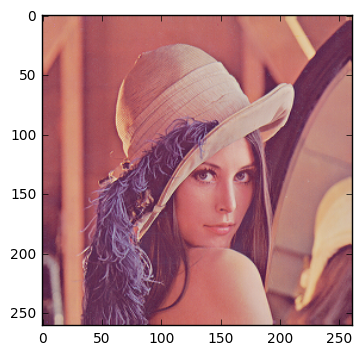

In [39]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][0]
tmp[..., 1] = coeffs[1][0]
tmp[..., 2] = coeffs[2][0]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
print(tmp)
plt.imshow(tmp)

_tmp = [[[205 138 127]
  [204 136 134]
  [207 137 125]
  ..., 
  [192 101  93]
  [220 158 131]
  [218 151 128]]

 [[205 137 126]
  [205 136 131]
  [207 137 125]
  ..., 
  [175  92  92]
  [207 141 122]
  [211 143 124]]

 [[205 137 127]
  [205 136 132]
  [207 137 125]
  ..., 
  [180  95  92]
  [210 146 125]
  [212 145 125]]

 ..., 
 [[105  54 175]
  [ 99  52  67]
  [ 92  46  83]
  ..., 
  [176  92  94]
  [171  82  90]
  [169  85  94]]

 [[106  52  62]
  [ 99  48  76]
  [ 90  40  72]
  ..., 
  [175  82  93]
  [167  86  91]
  [167  84  96]]

 [[100  51  85]
  [ 98  49  77]
  [102  53  83]
  ..., 
  [154  71  88]
  [161  82  90]
  [155  78  91]]] 
coeffs[0][0] = [[ 447.88935089  446.91964722  452.82627869 ...,  414.66342163
   486.90554047  480.54705048]
 [ 447.50578308  448.5786438   454.00028992 ...,  371.14663696
   454.45531464  462.91581726]
 [ 447.62573242  448.05160522  453.84231567 ...,  383.45916748  462.0065155
   467.1547699 ]
 ..., 
 [ 194.04553223  178.57804871  159.66210938 ..

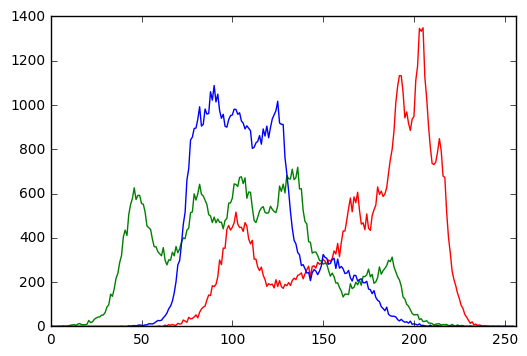

In [40]:
# Histogram of the LL0 subband
_tmp = tmp[:][:][:]*256
#_tmp = _tmp.astype(int)
_tmp = np.uint8(_tmp)
#colors = ('r','g','b')
print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [41]:
# Subband LL
entropy_LL = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_LL[i] = st.entropy(histr[i])
    print(col, entropy_LL[i])

r [ 4.82352448]
g [ 5.08182573]
b [ 4.64380789]


In [42]:
expected_LL_bytes = 0
for i,col in enumerate(colors):
    expected_LL_bytes += entropy_LL[i]
expected_LL_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_LL_bytes /= 8.0
print("Expected length of the LL subband (all components) =", expected_LL_bytes, "bytes")

Expected length of the LL subband (all components) = [ 123887.8984375] bytes


Install with [Pillow](https://python-pillow.org) with "`pip3 install pillow`".

In [43]:
from PIL import Image
im = Image.fromarray(_tmp)
im.save("L0.png")

1.0 0.0


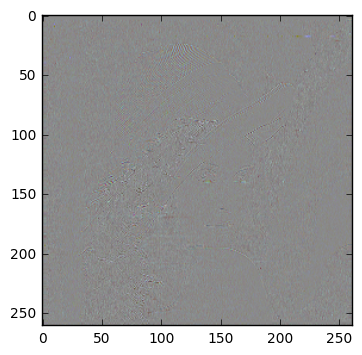

In [143]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][1][0]
tmp[..., 1] = coeffs[1][1][0]
tmp[..., 2] = coeffs[2][1][0]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
print (tmp.max(), tmp.min())
plt.imshow(tmp)

(261, 261, 3)


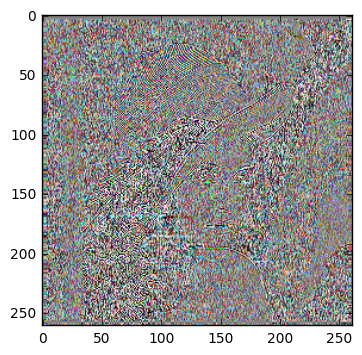

In [144]:
tmp_ = tmp * 256
tmp_ = tmp_.astype('uint8')
print(tmp_.shape)
tmp_[:,:,0] = cv2.equalizeHist(tmp_[:,:,0])
tmp_[:,:,1] = cv2.equalizeHist(tmp_[:,:,1])
tmp_[:,:,2] = cv2.equalizeHist(tmp_[:,:,2])
plt.imshow(tmp_)

(261, 261, 3)


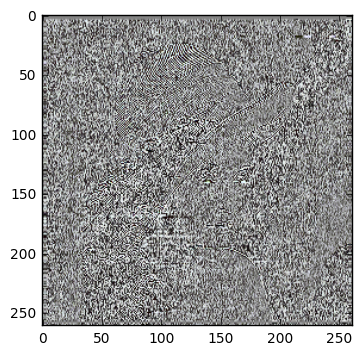

In [145]:
tmp_ = tmp * 256
tmp_ = tmp_.astype('uint8')
print(tmp_.shape)
yuv = cv2.cvtColor(tmp_, cv2.COLOR_RGB2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0]) # equalize the histogram of the Y (=0) channel
rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB) # convert the YUV image back to RGB format
plt.imshow(rgb)

(261, 261, 3)


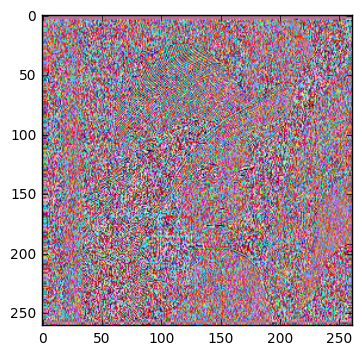

In [146]:
tmp_ = tmp * 256
tmp_ = tmp_.astype('uint8')
print(tmp_.shape)
yuv = cv2.cvtColor(tmp_, cv2.COLOR_RGB2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])   # equalize the histogram of the Y (=0) channel
yuv[:,:,1] = cv2.equalizeHist(yuv[:,:,1])   # equalize the histogram of the U (=1) channel
yuv[:,:,2] = cv2.equalizeHist(yuv[:,:,2])   # equalize the histogram of the V (=2) channel
rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)  # convert the YUV image back to RGB format
plt.imshow(rgb)

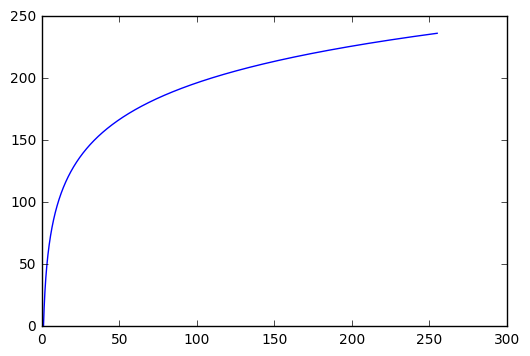

In [147]:
t = np.arange(1.0, 255.0, 0.01)
plt.plot(t, np.log(t)*256/6)

0.0 177.446
[[[ 255.0504303   254.86651611  254.59587097]
  [ 255.23683167  254.9868927   254.43103027]
  [ 255.06665039  255.32983398  255.25616455]
  ..., 
  [ 251.54400635  252.82987976  255.14009094]
  [ 253.31756592  252.10850525  253.24424744]
  [ 254.0614624   253.86524963  254.34828186]]

 [[ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  ..., 
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]]

 [[ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  ..., 
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]]

 ..., 
 [[ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092  255.08319092]
  [ 255.08319092  255.08319092 

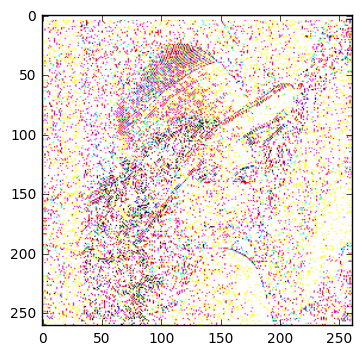

In [148]:
tmp_ = np.log((tmp + 1.0)*256.0)*256/6
print((np.log(tmp+1.0)*256).min(), (np.log(tmp+1.0)*256).max())
plt.imshow(tmp_.astype('uint8'))
print(tmp_, tmp_.min(), tmp_.max())

0.00205189 258.484


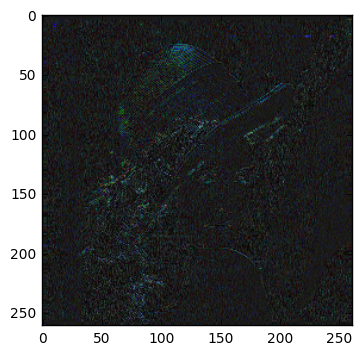

In [162]:
tmp_ = np.log(np.abs(tmp-0.5)+1.0)*255/0.4
print(tmp_.min(), tmp_.max())
plt.imshow(tmp_.astype('uint8'))

In [ ]:
# Histogram of the LH0 subband
_tmp = tmp[:][:][:]*256
_tmp = np.uint8(_tmp)
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
entropy_LH = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_LH[i] = st.entropy(histr[i])
    print(col, entropy_LH[i])

In [ ]:
expected_LH_bytes = 0
for i,col in enumerate(colors):
    expected_LH_bytes += entropy_LH[i]
expected_LH_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_LH_bytes /= 8.0
print("Expected length of the LH subband (all components) =", expected_LH_bytes, "bytes")

In [ ]:
im = Image.fromarray(_tmp)
im.save("LH0.png")

In [ ]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][1][1]
tmp[..., 1] = coeffs[1][1][1]
tmp[..., 2] = coeffs[2][1][1]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
plt.imshow((tmp - 128) * 10 + 128)

In [ ]:
# Histogram of the HL0 subband
_tmp = tmp[:][:][:]*256
_tmp = np.uint8(_tmp)
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
entropy_HL = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_HL[i] = st.entropy(histr[i])
    print(col, entropy_HL[i])

In [ ]:
expected_HL_bytes = 0
for i,col in enumerate(colors):
    expected_HL_bytes += entropy_HL[i]
expected_HL_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_HL_bytes /= 8.0
print("Expected length of the HL subband (all components) =", expected_HL_bytes, "bytes")

In [ ]:
im = Image.fromarray(_tmp)
im.save("HL0.png")

In [ ]:
tmp = np.zeros((coeffs[0][0].shape[0],coeffs[0][0].shape[1],3), 'float32')
tmp[..., 0] = coeffs[0][1][2]
tmp[..., 1] = coeffs[1][1][2]
tmp[..., 2] = coeffs[2][1][2]
max = tmp.max()
min = tmp.min()
maxmin = max - min
tmp = (tmp - min) / maxmin
plt.imshow((tmp - 128) * 2 + 128)

In [ ]:
# Histogram of the HH0 subband
_tmp = tmp[:][:][:]*256
_tmp = np.uint8(_tmp)
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([_tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

In [ ]:
entropy_HH = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_HH[i] = st.entropy(histr[i])
    print(col, entropy_HH[i])

In [ ]:
expected_HH_bytes = 0
for i,col in enumerate(colors):
    expected_HH_bytes += entropy_HH[i]
expected_HH_bytes *= (coeffs[0][0].shape[0] * coeffs[0][0].shape[1])
expected_HH_bytes /= 8.0
print("Expected length of the HH subband (all components) =", expected_HH_bytes, "bytes")

In [ ]:
im = Image.fromarray(_tmp)
im.save("HH0.png")

In [ ]:
expected_HFS_bytes = expected_HL_bytes + expected_HL_bytes + expected_HH_bytes
print("Expected length of the high-frequency subbands (all components) =", expected_HFS_bytes, "bytes")

To transform the 1-level DWT space into the 1-level LPT space, we need compute LPT H0 level according to the content of the HL0, LH0 and HH0 DWT subbands and discarding LL0.

In [ ]:
coeffs[0][0][:] = 0.0
coeffs[1][0][:] = 0.0
coeffs[2][0][:] = 0.0

In [ ]:
# Compute the inverse DWT of each component
component = [None]*3
for i,col in enumerate(colors):
    component[i] = pywt.idwt2(coeffs[i], 'bior3.5')
    #coeffs[i] = I[:,:,i]

In [ ]:
tmp = np.zeros((I.shape[0],I.shape[1],3), 'uint8')
tmp[..., 0] = component[0] + 128
tmp[..., 1] = component[1] + 128
tmp[..., 2] = component[2] + 128

In [ ]:
plt.imshow((tmp - 128) * 10 + 128)

In [ ]:
# Histogram of the pyramid level 0 (H0)

#_tmp = tmp[:][:][:]*256
# print("_tmp =", _tmp, "\ncoeffs[0][0] =", coeffs[0][0])
histr = [0 for col in colors]
for i,col in enumerate(colors):
    histr[i] = cv2.calcHist([tmp],[i],None,[256],[0,256])
    plt.plot(histr[i], color = col)
plt.xlim([0,256])
plt.show()

#colors = ('r','g','b')
##sum_histr = [0 for i,col in enumerate(colors)]
##for i,col in enumerate(colors):
##    sum_histr[i] = np.zeros([256,1], np.float64)
#for i,col in enumerate(colors):
#    histr = cv2.calcHist([tmp],[i],None,[256],[0,256])
##    for n in range(N):
##        histr = cv2.calcHist([H[n]],[i],None,[256],[0,256]) # cv2.calcHist returns a float64 array
##        sum_histr[i] += histr
#    plt.plot(histr, color = col)
#plt.xlim([0,256])
#plt.show()

In [ ]:
entropy_H0 = [0. for i,col in enumerate(colors)]
for i,col in enumerate(colors):
    entropy_H0[i] = st.entropy(histr[i])[0]
    print(col, entropy_H0[i])

In [ ]:
expected_H0_bytes = 0
print (type(expected_H0_bytes))
for i,col in enumerate(colors):
    expected_H0_bytes += entropy_H0[i]
print (expected_H0_bytes)
expected_H0_bytes *= (I.shape[0] * I.shape[1])
expected_H0_bytes /= 8.0
print("Expected length of the H0 subband (all components) =", expected_H0_bytes, "bytes")

In [ ]:
from PIL import Image
im = Image.fromarray(tmp)
im.save("H0.png")

Let's perform an [histogram equalization](http://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html) to improve the contrast of the H0 image.

In [ ]:
yuv = cv2.cvtColor(tmp, cv2.COLOR_RGB2YUV)

# equalize the histogram of the Y channel
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])

# convert the YUV image back to RGB format
rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)

In [ ]:
plt.imshow(rgb)

In [ ]:
tmp_amplified = (tmp - 128) * 10 + 128
print ("amp =", tmp_amplified, "tmp =", tmp)

In [ ]:
plt.imshow((tmp - 128) * 10 + 128)